In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

modules = ["Alpha", "Bravo", "Charlie", "Delta", "Echo"]
days = 100  # Simulate 100 Martian days

def simulate_module(name):
    return {
        "module": [name]*days,
        "day": list(range(1, days+1)),
        "soil_hydration": np.clip(np.random.normal(70, 10, days), 50, 100),
        "sunlight_exposure": np.clip(np.random.normal(6, 1.5, days), 3, 9),  # hours
        "co2_level": np.clip(np.random.normal(400, 50, days), 300, 500),  # ppm
        "radiation": np.clip(np.random.normal(20, 5, days), 10, 35),  # mSv
        "temp_celsius": np.clip(np.random.normal(18, 4, days), 10, 25),
    }

# Combine all module data
df = pd.concat([pd.DataFrame(simulate_module(m)) for m in modules])
df.reset_index(drop=True, inplace=True)
df.head()


,module,day,soil_hydration,sunlight_exposure,co2_level,radiation,temp_celsius
0,Alpha,1,74.967142,3.876944,417.889368,15.855025,11.622289
1,Alpha,2,68.617357,5.369032,428.039226,17.199095,15.602500
2,Alpha,3,76.476885,5.485928,454.152562,23.736468,18.020975
3,Alpha,4,85.230299,4.796584,452.690103,23.051851,18.187922
4,Alpha,5,67.658466,5.758071,331.116532,19.895492,16.199738


In [3]:
def growth_formula(row):
    hydration = row['soil_hydration']
    sunlight = row['sunlight_exposure']
    co2 = row['co2_level']
    radiation = row['radiation']
    temp = row['temp_celsius']

    # Simple formula with noise
    growth = (
        0.03 * hydration +
        0.5 * sunlight +
        0.02 * co2 -
        0.4 * radiation +
        0.6 * temp +
        np.random.normal(0, 2)
    )
    return max(0, growth)

df['green_bean_growth_cm'] = df.apply(growth_formula, axis=1)

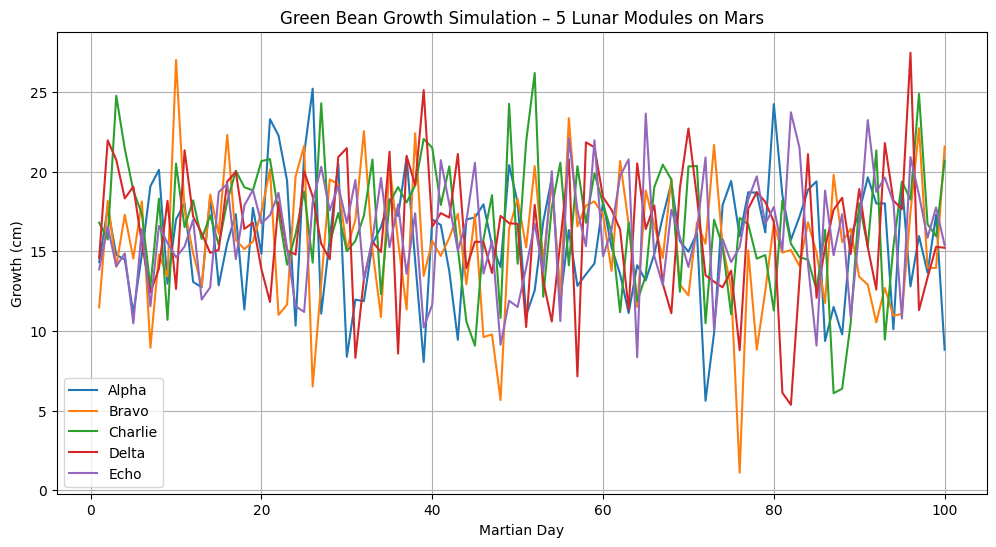

In [4]:
plt.figure(figsize=(12, 6))
for module in modules:
    sub = df[df["module"] == module]
    plt.plot(sub["day"], sub["green_bean_growth_cm"], label=module)

plt.title("Green Bean Growth Simulation – 5 Lunar Modules on Mars")
plt.xlabel("Martian Day")
plt.ylabel("Growth (cm)")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
df.to_csv("green_bean_mars_dataset.csv", index=False)